In [1]:
import numpy as np
import pandas as pd
from uncertainties import unumpy, ufloat

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes
import matplotlib.gridspec as gridspec

In [2]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

params = {'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{helvet}',
                                 r'\usepackage{sansmath}',
                                 r'\sansmath',
                                 r'\sisetup{detect-all}']}
plt.rcParams.update(params)

### Read in theory

In [3]:
n31_theory = pd.read_csv('dimer_spectra_n31.dat', skiprows=1, delimiter=r'\s+', header=None)
n31_theory.columns = ['detuning', 'polarized', 'unpolarized']

n34_theory = pd.read_csv('dimer_spectra_n34.dat', skiprows=1, delimiter=r'\s+', header=None)
n34_theory.columns = ['detuning', 'polarized', 'unpolarized']

n40_theory = pd.read_csv('dimer_spectra_n40.dat', skiprows=1, delimiter=r'\s+', header=None)
n40_theory.columns = ['detuning', 'polarized', 'unpolarized']

### Read in experimental data

In [4]:
n31_dir = os.path.join('20190120-n31','20190117-n31-exp_spectra.xlsx')
n31_data = pd.read_excel(n31_dir, sheet_name=['polarized', 'unpolarized'], index_col=[0,1])

n34_dir = os.path.join('20190123-n34','20190123-n34-exp_spectra.xlsx')
n34_data = pd.read_excel(n34_dir, sheet_name=['polarized', 'unpolarized'], index_col=[0,1])

n40_dir = os.path.join('20190414-n40','20190414-n40-exp_spectra.xlsx')
n40_data = pd.read_excel(n40_dir, sheet_name=['polarized', 'unpolarized'], index_col=[0,1])

n31_data_pol = n31_data['polarized']
n31_data_unpol = n31_data['unpolarized']

n34_data_pol = n34_data['polarized']
n34_data_unpol = n34_data['unpolarized']

n40_data_pol = n40_data['polarized']
n40_data_unpol = n40_data['unpolarized']

# Plots

### Plotting n=34, n=40

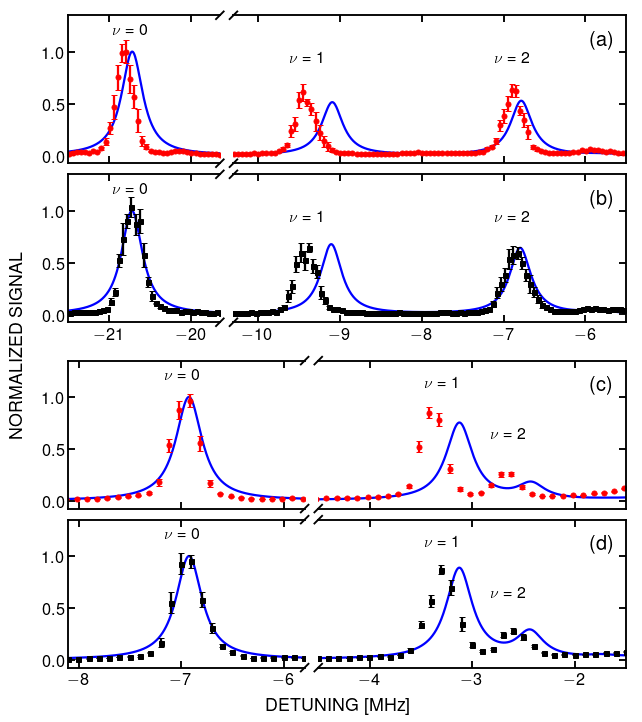

In [6]:
sns.set_context('talk')

# brokenaxes options
bax_options = {'d':0.0075,
               'despine':False,
               'wspace':0.05}

# Errorbar plot options
exp_plot_options = {'markersize':5,
                    'capsize':3,
                    'zorder':2}

# Theory plot options
th_plot_options = {'zorder':1,
                   'color':'blue'}

fig = plt.figure(figsize=(10,12))

gs = gridspec.GridSpec(2,1, hspace=0.125)

gs_upper = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], hspace=0.075)
gs_lower = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], hspace=0.075)

###############################
# Setting up brokenaxes subplots
bax1 = brokenaxes(xlims=((-21.5,-19.65),(-10.3,-5.5)), subplot_spec=gs_upper[0], **bax_options)
bax2 = brokenaxes(xlims=((-21.5,-19.65),(-10.3,-5.5)), subplot_spec=gs_upper[1], **bax_options)

bax3 = brokenaxes(xlims=((-8.1,-5.8),(-4.5,-1.5)), subplot_spec=gs_lower[0], **bax_options)
bax4 = brokenaxes(xlims=((-8.1,-5.8),(-4.5,-1.5)), subplot_spec=gs_lower[1], **bax_options)

###############################
# Plotting n=34 data

scale_data_x = -6.05
scale_data_mult = 1

# n=34 polarized (experiment)
normalization = ufloat(5961.435842778003, 45.94424503265815)
detuning = n34_data_pol['detuning'].values
num_count = n34_data_pol['count'].values
signal_mean = n34_data_pol['sfiIntegral_adjusted mean'].values/normalization.nominal_value
signal_std = n34_data_pol['sfiIntegral_adjusted std'].values/normalization.nominal_value/np.sqrt(num_count)

df = pd.DataFrame({'detuning':detuning, 'signal_mean':signal_mean, 'signal_std':signal_std})
df.loc[df['detuning']>=scale_data_x, 'signal_mean'] = scale_data_mult*df[df['detuning']>=scale_data_x]['signal_mean']
df.loc[df['detuning']>=scale_data_x, 'signal_std'] = scale_data_mult*df[df['detuning']>=scale_data_x]['signal_std']

bax1.errorbar(df['detuning'], df['signal_mean'], yerr=df['signal_std'], **exp_plot_options, color='red', fmt='o')

# n=34 polarized (theory)

df = pd.DataFrame({'detuning':n34_theory['detuning'], 'signal_mean':n34_theory['polarized']/max(n34_theory['polarized'])})
df.loc[df['detuning']>=scale_data_x, 'signal_mean'] = scale_data_mult*df[df['detuning']>=scale_data_x]['signal_mean']

bax1.plot(df['detuning'], df['signal_mean'], **th_plot_options)

# n=34 unpolarized (experiment)
normalization = ufloat(1693.5466592849536, 95.41724843803713)
detuning = n34_data_unpol['detuning'].values
num_count = n34_data_unpol['count'].values
signal_mean = n34_data_unpol['sfiIntegral_adjusted mean'].values/normalization.nominal_value
signal_std = n34_data_unpol['sfiIntegral_adjusted std'].values/normalization.nominal_value/np.sqrt(num_count)

df = pd.DataFrame({'detuning':detuning, 'signal_mean':signal_mean, 'signal_std':signal_std})
df.loc[df['detuning']>=scale_data_x, 'signal_mean'] = scale_data_mult*df[df['detuning']>=scale_data_x]['signal_mean']
df.loc[df['detuning']>=scale_data_x, 'signal_std'] = scale_data_mult*df[df['detuning']>=scale_data_x]['signal_std']

bax2.errorbar(df['detuning'], df['signal_mean'], yerr=df['signal_std'], **exp_plot_options, color='black', fmt='s')

# n=34 unpolarized (theory)

df = pd.DataFrame({'detuning':n34_theory['detuning'], 'signal_mean':n34_theory['unpolarized']/max(n34_theory['unpolarized'])})
df.loc[df['detuning']>=scale_data_x, 'signal_mean'] = scale_data_mult*df[df['detuning']>=scale_data_x]['signal_mean']

bax2.plot(df['detuning'], df['signal_mean'], **th_plot_options)

###############################
# Plotting n=40 data

# n=40 polarized (experiment)
normalization = ufloat(4008.258972215465, 50.0471124704337)
detuning = n40_data_pol['detuning'].values
num_count = n40_data_pol['count'].values
signal_mean = n40_data_pol['sfiIntegral_adjusted mean'].values/normalization.nominal_value
signal_std = n40_data_pol['sfiIntegral_adjusted std'].values/normalization.nominal_value/np.sqrt(num_count)

df = pd.DataFrame({'detuning':detuning, 'signal_mean':signal_mean, 'signal_std':signal_std})

bax3.errorbar(df['detuning'], df['signal_mean'], yerr=df['signal_std'], **exp_plot_options, color='red', fmt='o')

# n=40 polarized (theory)
bax3.plot(n40_theory['detuning'], n40_theory['polarized']/max(n40_theory['polarized']), **th_plot_options)

# n=40 unpolarized (experiment)
normalization = ufloat(790.5898674775613, 12.359769173627852)
detuning = n40_data_unpol['detuning'].values
num_count = n40_data_unpol['count'].values
signal_mean = n40_data_unpol['sfiIntegral_adjusted mean'].values/normalization.nominal_value
signal_std = n40_data_unpol['sfiIntegral_adjusted std'].values/normalization.nominal_value/np.sqrt(num_count)

df = pd.DataFrame({'detuning':detuning, 'signal_mean':signal_mean, 'signal_std':signal_std})

bax4.errorbar(df['detuning'], df['signal_mean'], yerr=df['signal_std'], **exp_plot_options, color='black', fmt='s')

# n=40 unpolarized (theory)
bax4.plot(n40_theory['detuning'], n40_theory['unpolarized']/max(n40_theory['unpolarized']), **th_plot_options)

###############################
# Add subfigure identifiers
for idx, bax in enumerate([bax1, bax2, bax3, bax4]):
    
    [[x0, y0], [x1, y1]] = np.array(bax.axs[-1].get_position())
    
    subfigure_label_x = 0.85
    subfigure_label_y = 0.8*(y1-y0) + y0
        
    if idx==0:
        subfigure_label = r'(a)'
    elif idx==1:
        subfigure_label = r'(b)'
    elif idx==2:
        subfigure_label = r'(c)'
    elif idx==3:
        subfigure_label = r'(d)'
    else:
        print('ERROR')
    
    bax.axs[-1].text(subfigure_label_x, subfigure_label_y, subfigure_label, transform=fig.transFigure, fontsize=20)

###############################
# Axis tick options
for bax in [bax1, bax2, bax3, bax4]:
    bax.tick_params(axis='both', which='both', direction='in', length=7)
    
    # Have x-axis ticks above and below
    for ax in bax.axs:
        ax.xaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
    
    # Set y-axis ticks
    bax.axs[0].set_yticks([-0.5, 0.0, 0.5, 1.0, 1.5], minor=False)
    bax.axs[-1].set_yticks([-0.5, 0.0, 0.5, 1.0, 1.5], minor=False)
    
    # Have y-axis ticks on far left and far right
    bax.axs[-1].set_yticklabels([], minor=False)
    bax.axs[0].yaxis.set_ticks_position('left')
    bax.axs[-1].yaxis.set_ticks_position('right')

# Remove tick labels from bax1 and bax3
for bax in [bax1, bax3]:
    for ax in bax.axs:
        ax.set_xticklabels([], minor=False)

###############################
# Set y-axis limits
for bax in [bax1, bax2, bax3, bax4]:
    for ax in bax.axs:
        # Can't use bax or else right-side y-axis ticks go away
        ax.set_ylim((-0.075, 1.35))

###############################
# Label states
label_options = {'fontsize':16,
                 'ha':'center'}
# n=34 polarized
bax1.axs[0].text(-20.75, 1.175, r'$\nu=0$', **label_options)
bax1.axs[1].text(-9.4, 0.9, r'$\nu=1$', **label_options)
bax1.axs[1].text(-6.9, 0.9, r'$\nu=2$', **label_options)

# n=34 unpolarized
bax2.axs[0].text(-20.75, 1.175, r'$\nu=0$', **label_options)
bax2.axs[1].text(-9.4, 0.9, r'$\nu=1$', **label_options)
bax2.axs[1].text(-6.9, 0.9, r'$\nu=2$', **label_options)

# n=40 polarized
bax3.axs[0].text(-7, 1.175, r'$\nu=0$', **label_options)
bax3.axs[1].text(-3.3, 1.1, r'$\nu=1$', **label_options)
bax3.axs[1].text(-2.65, 0.6, r'$\nu=2$', **label_options)

# n=40 polarized
bax4.axs[0].text(-7, 1.175, r'$\nu=0$', **label_options)
bax4.axs[1].text(-3.3, 1.1, r'$\nu=1$', **label_options)
bax4.axs[1].text(-2.65, 0.6, r'$\nu=2$', **label_options)

###############################
# Axis labels
fig.text(0.5, 0.075, r'DETUNING [\si{\MHz}]', ha='center')
fig.text(0.04, 0.5, 'NORMALIZED SIGNAL', va='center', rotation='vertical')

###############################
# Figure output

plt.savefig('Fig7.pdf', bbox_inches='tight')

plt.show()